In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_checkerboard, make_classification  

c:\users\windows\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [11]:
X_all,y_all = make_classification(
    n_samples= 120,  # x örneklem sayısı
    n_features=2,   # xin kolon sayısı
    n_classes=2,  # y'nin alacağı değerler 
    n_informative=2,   # bağımsız değişkenlerden kaçı bilgi verecek 
    n_redundant=0,   # gereksiz bağımsız değişkenlerin sayısı
    random_state=42) # herkeste aynı dayaset olması için konluna değer

In [12]:
from sklearn.model_selection import train_test_split

c:\users\windows\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [38]:
X, X_reserve, y, y_reserve= train_test_split(X_all, y_all, test_size=20, random_state=42)

In [39]:
X.shape

(100, 2)

In [40]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

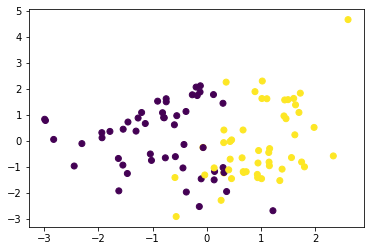

In [41]:
plt.scatter(X.T[0],X.T[1], c=y)   # x in durumunu görüyoryz

In [55]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=20, random_state=42)

In [56]:
X_train.shape

(80, 2)

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
model= DecisionTreeClassifier()

In [59]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [60]:
model.score(X_train, y_train)

1.0

In [61]:
model.score(X_test, y_test)

0.75

In [62]:
import sklearn
sklearn.__version__

'0.22.1'

In [63]:
depths= range(1,14)
test_scores=[]
train_scores=[]
for d in depths:
    model= DecisionTreeClassifier(max_depth=d)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

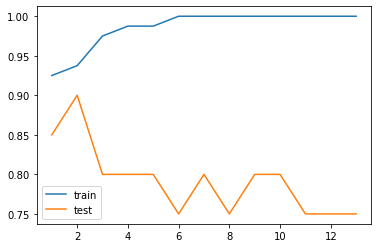

In [64]:
plt.plot(depths, train_scores, label="train")
plt.plot(depths, test_scores, label="test")
plt.legend()  # tek bir train ce test değerleri için

In [65]:
from sklearn.model_selection import cross_validate

In [66]:
depths= range(1,14)
test_scores=[]
train_scores=[]
for d in depths:
    model= DecisionTreeClassifier(max_depth=d)
    results= cross_validate(model, X_train, y_train, return_train_score=True, cv=10)
    train_scores.append(results["train_score"].mean())
    test_scores.append(results["test_score"].mean())

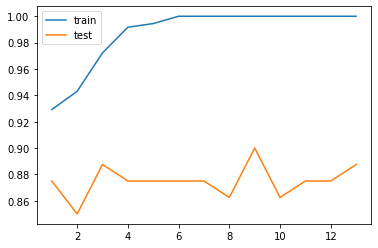

In [67]:
plt.plot(depths, train_scores, label="train")
plt.plot(depths, test_scores, label="test")
plt.legend()  # çoklu değerler 10 tane

In [71]:
model= DecisionTreeClassifier(max_depth=1)

In [72]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [73]:
model.score(X_test, y_test)

0.85

Text(0, 0.5, 'Hacim')

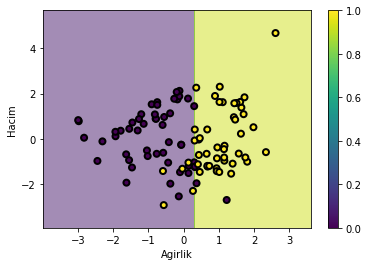

In [74]:
x0range = np.linspace(X.T[0].min() - 1, X.T[0].max() + 1, 1000)
x1range = np.linspace(X.T[1].min() - 1, X.T[1].max() + 1, 1000)
xx, yy = np.meshgrid(x0range, x1range)
plt.contourf(xx,
             yy,
             model.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape),
             alpha=0.5
            )
plt.scatter(X.T[0], X.T[1], c=y, linewidths=2, edgecolors='black')
plt.colorbar()
plt.xlabel('Agirlik')
plt.ylabel('Hacim')

In [75]:
from sklearn.metrics import confusion_matrix

In [84]:
y_predd= model.predict(X_train)  # train seti için
pd.DataFrame(confusion_matrix(y_train,y_pred))

,0,1
0,38,1
1,5,36


In [85]:
y_pred= model.predict(X_test)  # test seti için
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1
0,9,2
1,1,8


In [86]:
from sklearn.metrics import precision_score, recall_score
precision_score( y_test, y_pred)  # 1 dediklerimizden kaç tanesi 1. 
# aşağı doğru kontrol edilir

0.8

In [87]:
recall_score(y_test, y_pred)  
# 1 olanlardan kaçını bildik. Yana doğru okunur

0.8888888888888888

In [88]:
model= DecisionTreeClassifier(max_depth=1)
model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [89]:
model.score(X_reserve, y_reserve)

0.95